In [1]:
from phase_diagram.phase_diagram import PhaseDiagram

In [2]:
water = PhaseDiagram('water')

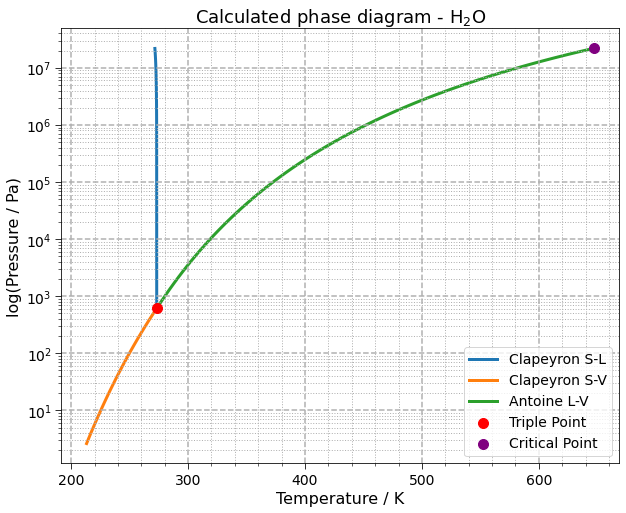

In [3]:
water.plot()

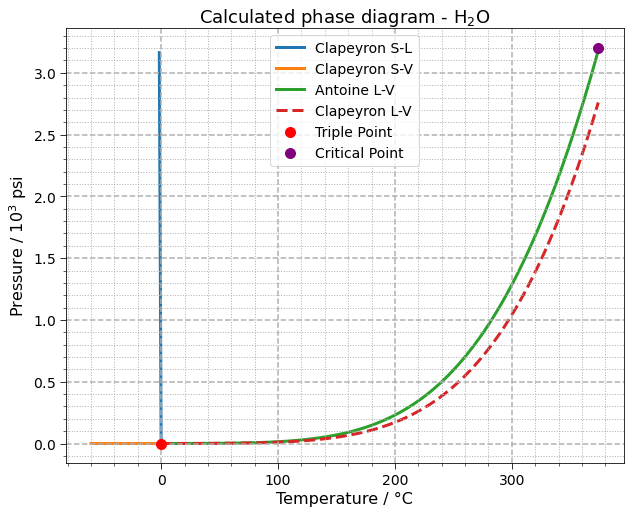

In [4]:
water.plot(T_unit='°C', P_unit='psi', clapeyron_lv=True, scale_log=False)

In [5]:
my_points = ({'data_tuple': water.triple_point,
             'label': 'Triple Point',
             'kwargs': {'color': 'yellow',
                        's': 100,
                        'zorder': 2}},
            {'data_tuple': water.boiling_point,
             'label': 'Boiling Point',
             'kwargs': {'color': 'cyan',
                        's': 50,
                        'zorder': 2}},
            {'data_tuple': (water.ureg('298.15 K'), water.ureg('1 atm')),
             'label': 'My Point',
             'kwargs': {'color': 'black',
                        's': 120,
                        'zorder': 2}},)

In [6]:
import numpy as np
temp = np.linspace(200, 700, 100) * water.ureg('K')
amb_press = np.full(len(temp), 1) * water.ureg('atm')

temp_pair = (298.15, 298.15) * water.ureg('K')
amb_temp = (10**2, 10**7)  * water.ureg('Pa')

In [7]:
my_arrays = ({'data_tuple': water.clapeyron_sl(),
             'label': 'SL',
             'kwargs': {'color': 'magenta',
                        'linewidth': 5,
                        'zorder': 1}},
            {'data_tuple': water.antoine_lv(),
             'label': 'LV',
             'kwargs': {'color': 'green',
                        'linewidth': 10,
                        'linestyle': '-.',
                        'zorder': 1}},
            {'data_tuple': (temp, amb_press),
             'label': 'Ambient Pressure',
             'kwargs': {'color': 'red',
                        'linewidth': 5,
                        'linestyle': ':',
                        'zorder': 1}},
            {'data_tuple': (temp_pair, amb_temp),
             'label': 'Ambient Temperature',
             'kwargs': {'color': 'red',
                        'linewidth': 5,
                        'linestyle': ':',
                        'zorder': 1}},)

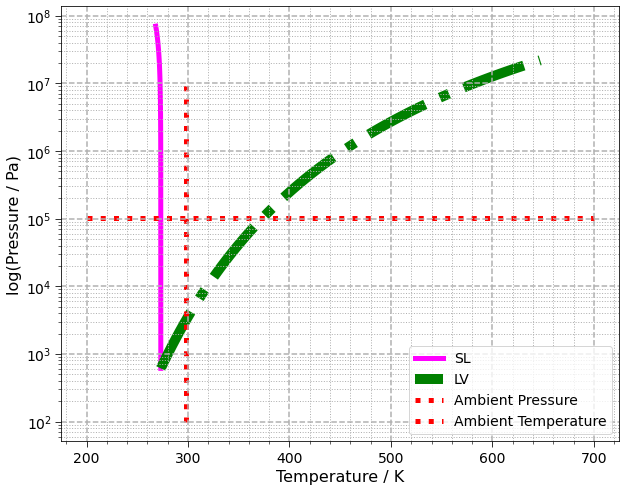

In [8]:
water.plot_custom(curves=my_arrays)

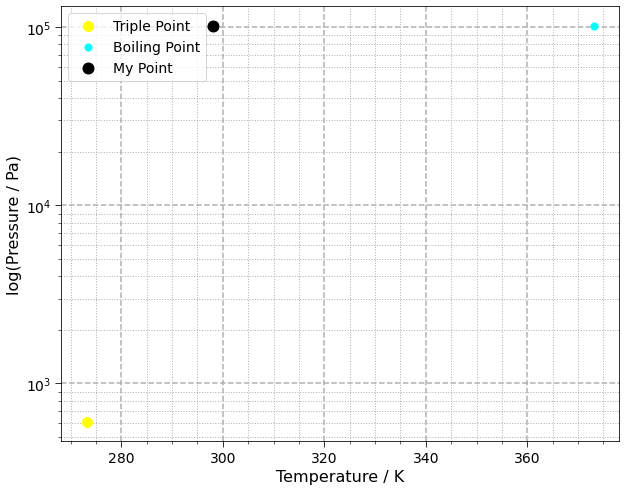

In [9]:
water.plot_custom(points=my_points)

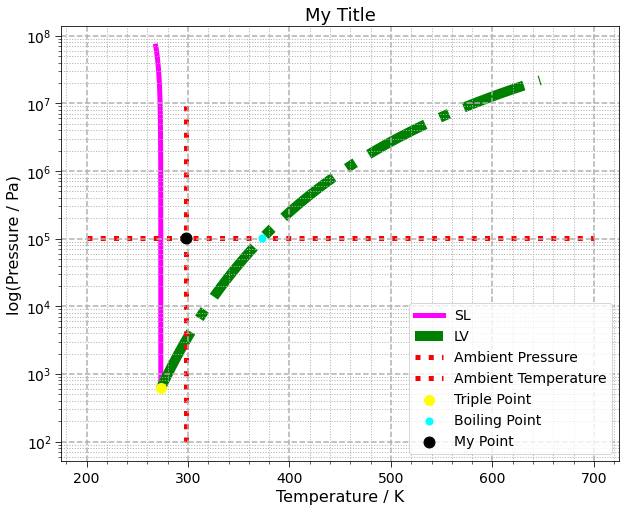

In [10]:
water.plot_custom(curves=my_arrays, points=my_points, title_text='My Title')

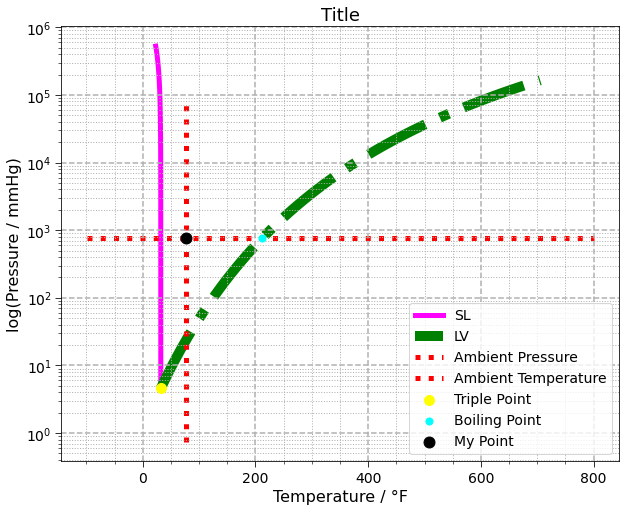

In [11]:
water.plot_custom(curves=my_arrays, points=my_points, title_text='Title', T_unit='°F', P_unit='mmHg')

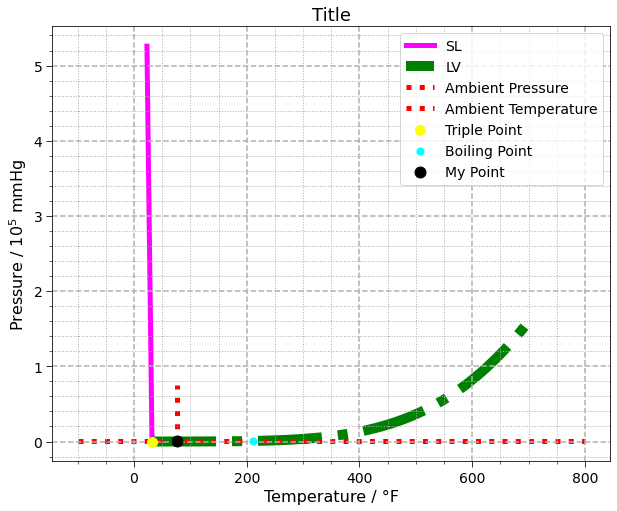

In [12]:
water.plot_custom(curves=my_arrays, points=my_points, title_text='Title', T_unit='°F', P_unit='mmHg', scale_log=False)

In [13]:
limit = water.critical_point.pressure
p_limit = water.clapeyron_sl()[1][water.clapeyron_sl()[1] < limit]
t_limit = water.clapeyron_sl()[0][:len(p_limit)]

In [14]:
my_arrays = ({'data_tuple': (t_limit, p_limit),
             'label': 'SL',
             'kwargs': {'color': 'magenta',
                        'linewidth': 5,
                        'zorder': 1}},
            {'data_tuple': water.antoine_lv(),
             'label': 'LV',
             'kwargs': {'color': 'green',
                        'linewidth': 10,
                        'linestyle': '-.',
                        'zorder': 1}},
            {'data_tuple': (temp, amb_press),
             'label': 'Ambient Pressure',
             'kwargs': {'color': 'red',
                        'linewidth': 5,
                        'linestyle': ':',
                        'zorder': 1}},
            {'data_tuple': (temp_pair, amb_temp),
             'label': 'Ambient Temperature',
             'kwargs': {'color': 'red',
                        'linewidth': 5,
                        'linestyle': ':',
                        'zorder': 1}},)

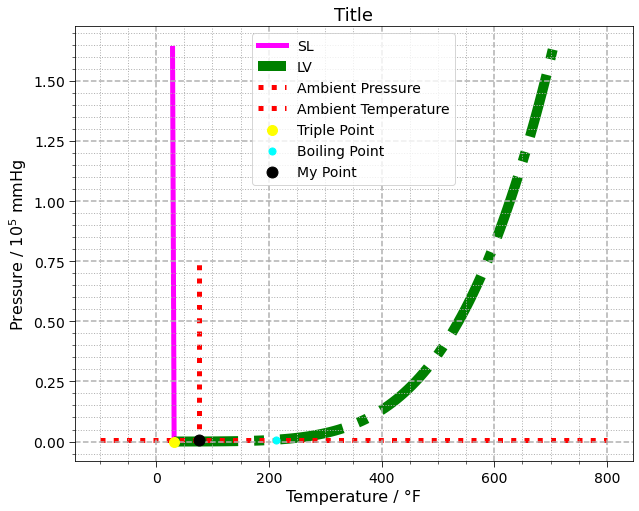

In [15]:
water.plot_custom(curves=my_arrays, points=my_points, title_text='Title', T_unit='°F', P_unit='mmHg', scale_log=False)

In [16]:
import matplotlib.pyplot as plt

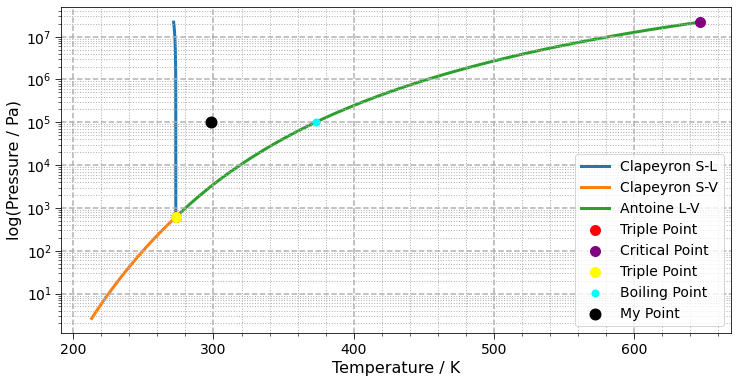

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor=(1, 1, 1))

water.plot(ax=ax)
water.plot_custom(points=my_points, ax=ax)

In [18]:
from src.plot import Plot

In [19]:
from src import plot

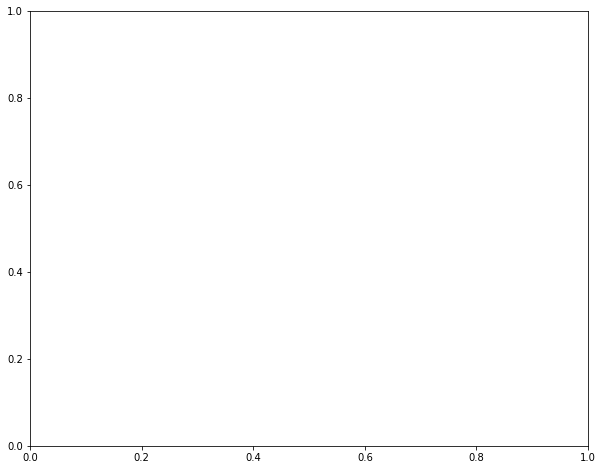

In [20]:
a = Plot(x_unit='K', y_unit='Pa', x_label='eixo x', y_label='eixo y')

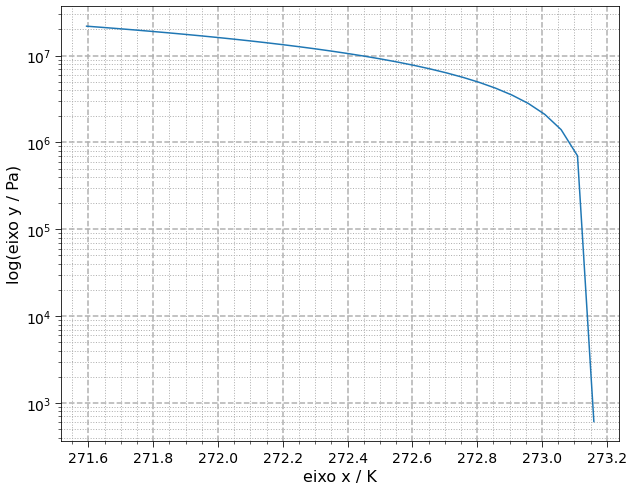

In [21]:
a = Plot(x_unit='K', y_unit='Pa', x_label='eixo x', y_label='eixo y')
a.plot_arrays(my_arrays[0]['data_tuple'])

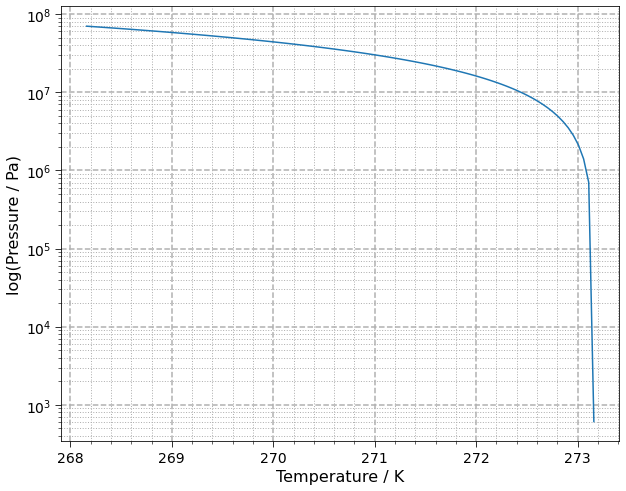

In [26]:
a = Plot(x_unit='K', y_unit='Pa', x_label='Temperature', y_label='Pressure')
a.plot_arrays(water.clapeyron_sl())

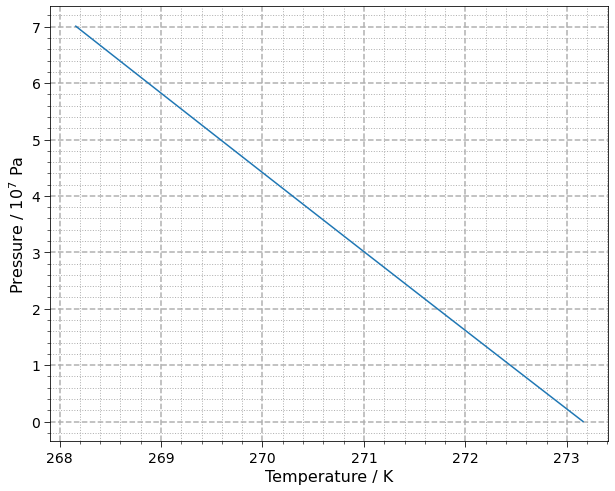

In [27]:
a = Plot(x_unit='K', y_unit='Pa', x_label='Temperature', y_label='Pressure', scale_log=False)
a.plot_arrays(water.clapeyron_sl())

# Interactive

https://discourse.jupyter.org/t/how-to-display-plots-only-after-plt-show-in-jup-notebook/2863

In [22]:
import matplotlib.pyplot as plt
from src.plot import Plot

In [23]:
import ipywidgets
from ipywidgets import interact, interactive, fixed

In [24]:
style = {'description_width': 'initial'}

temperature = ipywidgets.FloatSlider(
    value=300,
    min=200,
    max=700,
    step=50,
    description='Temperature / K:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style=style)

pressure = ipywidgets.FloatLogSlider(
    value=10**5,
    base=10,
    min=0,
    max=8,
    step=0.5,
    description='Pressure / Pa:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1e',
    style=style)

In [25]:
from IPython.display import display
def funcao(temperature, pressure):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor=(1, 1, 1))
    water.plot(ax=plt.gca())
    a = Plot(x_unit='K', y_unit='Pa', ax=plt.gca(), legend=True)
    a.plot_point([temperature * water.ureg('K'), pressure * water.ureg('Pa')], zorder=3, s=100, c='black', label='ponto')

graph = interactive(funcao,
                    temperature=temperature,
                    pressure=pressure,
                   )

display(graph)

interactive(children=(FloatSlider(value=300.0, continuous_update=False, description='Temperature / K:', max=70…